# Solving MNIST with an MLP

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

from importlib import reload

import fa
import ap

from train import *
from utils import *

In [2]:
mnist = mnist_data()
mnist_test = mnist_data(is_train=False)

##### Second Order Activity Perturbation

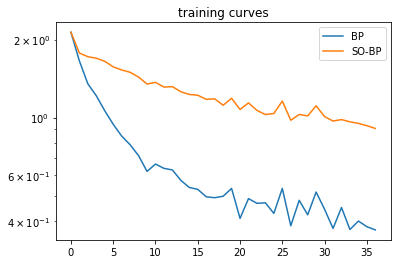

In [3]:
reload(fa)
reload(ap)

seed = 1
h1 = 100
h2 = 10
soap_lr = 1
soap_bias = 1e-3
isize = 28 * 28

train_args = {'regression':False, 'data': mnist, 'epochs': 0.2, 'optimizer':'SGD', 'sample_every':5, 'lr':0.05}

torch.manual_seed(1)
mlp1 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), nn.Tanh(), fa.BPLinear(h1, h2))
loss1 = train_net(mlp1, **train_args)['loss']

torch.manual_seed(1)
mlp2 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), ap.SOAP(soap_lr, soap_bias), nn.Tanh(), fa.BPLinear(h1, h2))
loss2 = train_net(mlp2, **train_args, updates=2)['loss']

plt.figure(0)
plt.title("training curves")
plt.semilogy(loss1);
plt.semilogy(loss2);
plt.legend(['BP', 'SO-BP']);

##### Feedback Alignment vs Back Propogation

In [ ]:
reload(fa)
reload(ap)

seed = 2
h1 = 256
h2 = 10
soap_lr = 1.0
soap_bias = 1e-3
isize = 28 * 28

train_args = {'regression':False, 'data': mnist, 'epochs': 2, 'optimizer':'SGD', 'sample_every':5, 'lr':0.01}

torch.manual_seed(seed)
mlp1 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), nn.Tanh(), fa.BPLinear(h1, h2))
loss1 = train_net(mlp1, **train_args)['loss']

torch.manual_seed(seed)
mlp2 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), ap.SOAP(soap_lr, soap_bias), nn.Tanh(), fa.BPLinear(h1, h2))
loss2 = train_net(mlp2, **train_args, updates=2)['loss']

torch.manual_seed(seed)
mlp3 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), nn.Tanh(), fa.FALinear(h1, h2))
loss3 = train_net(mlp3, **train_args)['loss']

torch.manual_seed(seed)
mlp4 = nn.Sequential(flatten(), fa.BPLinear(isize, h1), ap.SOAP(soap_lr, soap_bias), nn.Tanh(), fa.FALinear(h1, h2))
loss4 = train_net(mlp4, **train_args, updates=2)['loss']

plt.figure(0)
plt.title("training curves")
plt.semilogy(loss1);
plt.semilogy(loss2);
plt.semilogy(loss3);
plt.semilogy(loss4);
plt.legend(['BP', 'SO-BP', 'FA', 'SO-FA']);

# Convnets

### BP vs SO-BP

In [ ]:
reload(fa)
reload(ap)

seed = 1
soap_lr = 0.1

train_args = {'regression':False, 'data': mnist_test, 'epochs': 2, 'optimizer':'SGD', 'sample_every':5, 'lr':0.01}

torch.manual_seed(seed)
conv1 = nn.Sequential(
    nn.Conv2d(1, 6, 5), nn.ReLU(), nn.MaxPool2d(2), 
    nn.Conv2d(6, 16, 5), nn.ReLU(), nn.MaxPool2d(2), flatten(),
    nn.Linear(256, 120), nn.ReLU(),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Linear(84, 10)
)                      

torch.manual_seed(seed)
conv2 = nn.Sequential(
    nn.Conv2d(1, 6, 5), ap.SOAP(soap_lr), nn.ReLU(), nn.MaxPool2d(2), 
    nn.Conv2d(6, 16, 5), ap.SOAP(soap_lr), nn.ReLU(), nn.MaxPool2d(2), flatten(),
    nn.Linear(256, 120), ap.SOAP(soap_lr), nn.ReLU(),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Linear(84, 10)
)

loss1 = train_net(conv1, **train_args)['loss']
loss2 = train_net(conv2, updates=2, **train_args)['loss']

plt.figure(0)
plt.title("training curves")
plt.semilogy(loss1);
plt.semilogy(loss2);
plt.legend(['BP','SO-BP'])

### Measure accuracy

In [ ]:
test_categorical_accuracy(mlp1, mnist_test)

In [ ]:
test_categorical_accuracy(mlp2, mnist_test)